[[-1.26662566 -0.57329493]
 [-1.0623312   0.76439323]
 [-0.85803674 -1.62433562]
 [-0.65374228  0.63699436]
 [-0.44944782 -0.54144521]
 [-0.04085889  0.60514464]
 [ 0.36773003  1.17843957]
 [ 0.77631895 -1.65618534]
 [ 1.38920234  1.11474013]
 [ 1.79779126  0.09554915]]


E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

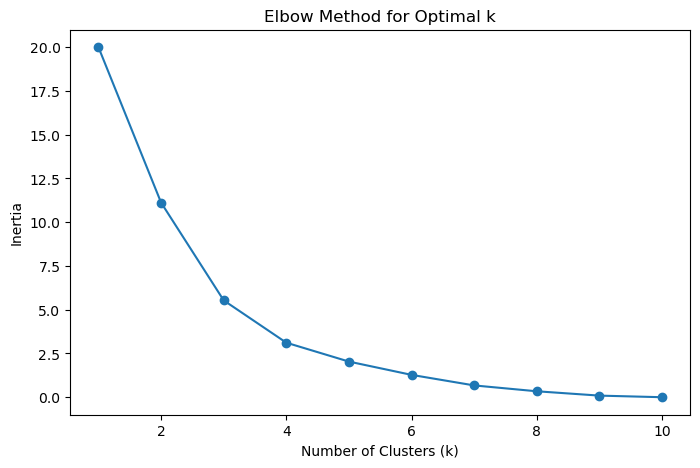

E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


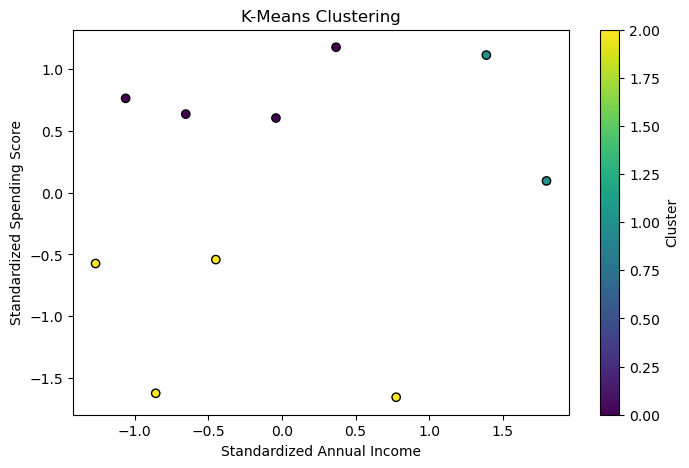

   Customer ID  Annual Income (k$)  Spending Score (1-100)  Cluster
0            1                  15                      39        2
1            2                  16                      81        0
2            3                  17                       6        2
3            4                  18                      77        0
4            5                  19                      40        2
5            6                  21                      76        0
6            7                  23                      94        0
7            8                  25                       5        2
8            9                  28                      92        1
9           10                  30                      60        1


In [1]:
#Assignment 13
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV
df = pd.read_csv("customer_data.csv")

# Selecting features
X = df.iloc[:, 1:3].values  # Using "Annual Income" and "Spending Score"

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)
# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Applying K-Means with k=3 (assuming the elbow method suggests 3 clusters) 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="viridis", edgecolors="black")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

# Displaying clustered data
print(df)

Dataset Preview:
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Missing Values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


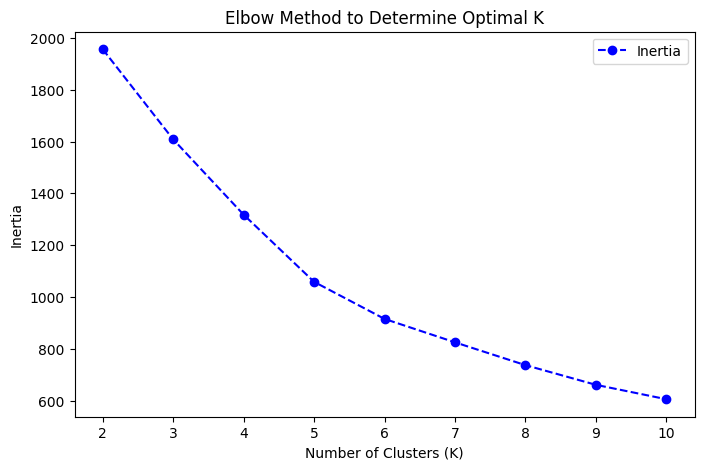


Cluster Assignments:
 Cluster
1    393
0     45
2      2
Name: count, dtype: int64


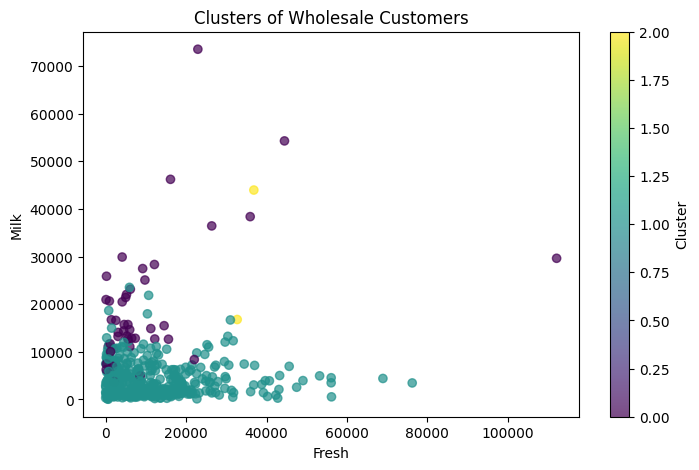


Clustered data saved successfully!


In [6]:
# Assignment 14
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "Wholesale customers data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("Dataset Preview:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Selecting only numerical columns for clustering (Excluding Channel & Region)
data = df.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Finding Optimal K (Elbow Method)
inertia = []
k_range = range(2, 11)  # Start from 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.legend()
plt.show()

# Applying K-Means Clustering
optimal_k = 3  # Choose K based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Display cluster assignments
print("\nCluster Assignments:\n", df["Cluster"].value_counts())

# Visualizing Clusters
# Scatter plot of two main features
plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.title("Clusters of Wholesale Customers")
plt.colorbar(label="Cluster")
plt.show()

# Save the clustered data to a new CSV file
df.to_csv("Wholesale_Customers_Clustered1.csv", index=False)
print("\nClustered data saved successfully!")


Sample Dataset:
    CustomerID  Annual_Income  Spending_Score
0           1             15              90
1           2             16              80
2           3             17              85
3           4             18              88
4           5             50              30
0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    0
13    0
14    0
15    0
16    3
17    3
18    3
19    3
Name: Cluster, dtype: int64


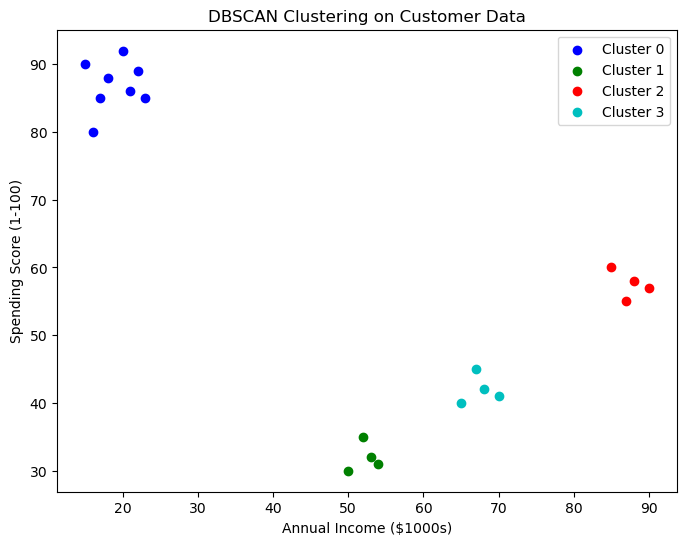

In [13]:
#Assignment 15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Create a synthetic dataset
data = {
    "CustomerID": np.arange(1, 21),  # 20 customers
    "Annual_Income": [15, 16, 17, 18, 50, 52, 53, 54, 85, 87, 88, 90, 20, 21, 22, 23, 65, 67, 68, 70],  # Income in $1000s
    "Spending_Score": [90, 80, 85, 88, 30, 35, 32, 31, 60, 55, 58, 57, 92, 86, 89, 85, 40, 45, 42, 41],  # Score (1-100)
}

df = pd.DataFrame(data)
print("Sample Dataset:\n", df.head())

# Step 2: Extract features for clustering
X = df[["Annual_Income", "Spending_Score"]].values  # Only use income & spending score

# Step 3: Standardize the Data
X_scaled = StandardScaler().fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)  # eps: radius, min_samples: minimum points per cluster
df["Cluster"] = dbscan.fit_predict(X_scaled)
print(df["Cluster"])

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
unique_labels = set(df["Cluster"])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for label, color in zip(unique_labels, colors):
    cluster_points = df[df["Cluster"] == label]
    plt.scatter(cluster_points["Annual_Income"], cluster_points["Spending_Score"],c=color, label=f'Cluster {label}' if label != -1 else 'Noise')

plt.legend()
plt.title("DBSCAN Clustering on Customer Data")
plt.xlabel("Annual Income ($1000s)")
plt.ylabel("Spending Score (1-100)")
plt.show()


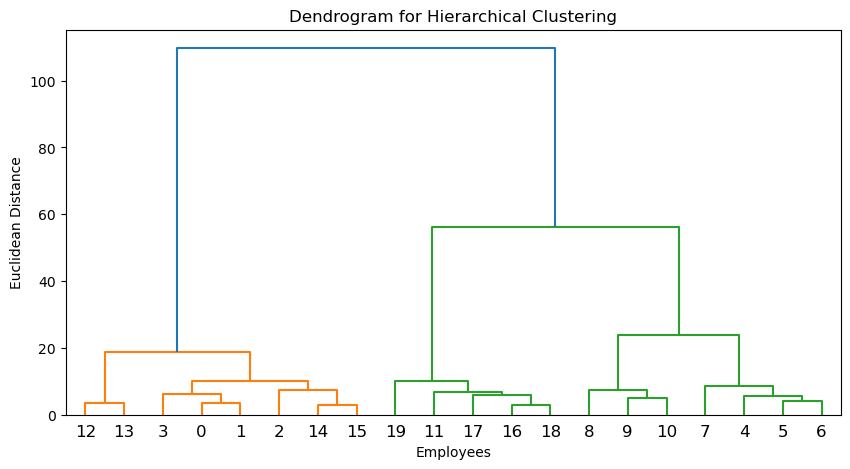

[1 1 1 1 0 0 0 0 0 0 0 2 1 1 1 1 2 2 2 2]


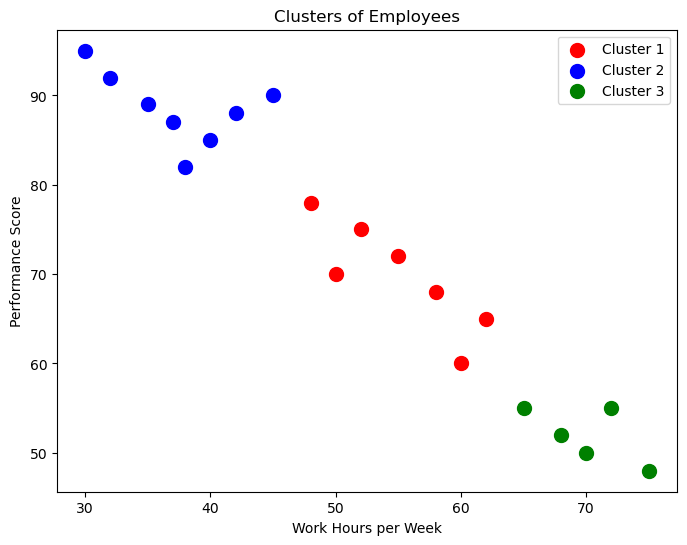

In [17]:
#Assignment 16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load dataset
file_path = "employee_performance_hc.csv"
df = pd.read_csv(file_path)

# Select features for clustering
X = df.iloc[:, 1:3].values  # Using Work_Hours_per_Week and Performance_Score

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Employees')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Employees')
plt.xlabel('Work Hours per Week')
plt.ylabel('Performance Score')
plt.legend()
plt.show()